## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [20]:
import pandas as pd

df = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")

In [21]:
df = df.dropna()
df

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease
...,...,...,...,...,...,...,...,...,...
199,Bridgett Franecki,55,0,1,128,205,2,130,No Disease
200,Mr. Foster Zieme,51,1,3,94,227,1,154,Disease
201,Lashanda Hagenes,42,1,2,120,295,1,162,Disease
202,Levern Trantow III,35,0,1,138,183,1,182,Disease


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X = df[['age', 'chol']]
y = df['diagnosis']

logistic_model = Pipeline(
  [("standardize", StandardScaler()),
  ("logistic", LogisticRegression())]
)

logistic_model_fitted = logistic_model.fit(X, y)

logistic_model_fitted

Pipeline(steps=[('standardize', StandardScaler()),
                ('logistic', LogisticRegression())])

In [23]:
import numpy as np

scaler = logistic_model.named_steps['standardize']
lr = logistic_model.named_steps['logistic']

coefs_log = lr.coef_[0] / scaler.scale_
intercept_log = lr.intercept_[0] - np.sum(scaler.mean_ * coefs_log)

print(coefs_log, intercept_log)


[0.04580681 0.00180928] -3.1846800977891396


In [24]:
import numpy as np

logit = np.log(0.5/(1 - 0.5))
age_55_50 = (logit - intercept_log - coefs_log[0] * 55) / coefs_log[1]

logit = np.log(0.9/(1 - 0.9))
age_55_90 = (logit - intercept_log - coefs_log[0] * 55) / coefs_log[1]

print(f"Chol for 55 year old to be predicted present: (0.5 threshold) {age_55_50}")
print(f"Chol for 55 year old to be predicted present: (0.9 threshold) {age_55_90}")

Chol for 55 year old to be predicted present: (0.5 threshold) 367.71778753271246
Chol for 55 year old to be predicted present: (0.9 threshold) 1582.135518225488


Or doing it without scaling for simplicity

In [25]:
from sklearn.linear_model import LogisticRegression

X = df[['age', 'chol']]
y = df['diagnosis']

model = LogisticRegression()
model.fit(X, y)


LogisticRegression()

In [26]:
model.coef_, model.intercept_


(array([[0.04686331, 0.00180124]]), array([-3.24011226]))

it gives us similar coefficients

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = df[['age', 'chol']]
y = df['diagnosis']

lda_model = Pipeline(
  [("standardize", StandardScaler()),
  ("lda", LinearDiscriminantAnalysis())]
)

lda_model_fitted = lda_model.fit(X, y)

lda_model_fitted


Pipeline(steps=[('standardize', StandardScaler()),
                ('lda', LinearDiscriminantAnalysis())])

In [28]:
scaler = lda_model.named_steps['standardize']
lda = lda_model.named_steps['lda']

coefs_lda = lda.coef_[0] / scaler.scale_
intercept_lda = lda.intercept_[0] - np.sum(scaler.mean_ * coefs_lda)

print(coefs_lda, intercept_lda)

[0.04655744 0.00178967] -3.2196776604068766


In [29]:
logit = np.log(0.5/(1 - 0.5))
age_55_50 = (logit - intercept_lda - coefs_lda[0] * 55) / coefs_lda[1]
print(f"Chol for 55 year old to be predicted present: (0.5 threshold) {age_55_50}")

Chol for 55 year old to be predicted present: (0.5 threshold) 368.2353575299383


## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

X = df[['age', 'chol']]
y = df['diagnosis']

# Define parameter grid for tuning regularization parameter C
param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100]}

svc_pipeline = Pipeline(
  [("standardize", StandardScaler()),
  ("svc", SVC(kernel="linear", probability=True))]
)

svc_pipeline_grid = GridSearchCV(svc_pipeline, param_grid, cv=5)
svc_pipeline_grid.fit(X, y)

# Best fitted pipeline & the SVC inside it
svc_pipeline_best = svc_pipeline_grid.best_estimator_
svc_model_best = svc_pipeline_best.named_steps["svc"]

svc_model_best

SVC(C=10, kernel='linear', probability=True)

In [31]:
scaler = svc_pipeline_best.named_steps['standardize']
svc = svc_pipeline_best.named_steps['svc']

coefs_svc = svc.coef_[0] / scaler.scale_
intercept_svc = svc.intercept_[0] - np.sum(scaler.mean_ * coefs_svc)

print(coefs_svc, intercept_svc)

[0.06439852 0.00364968] -4.683368740278215


In [32]:
logit = np.log(0.5/(1 - 0.5))
age_55_50 = (logit - intercept_svc - coefs_svc[0] * 55) / coefs_svc[1]
print(f"Chol for 55 year old to be predicted present: (0.5 threshold) {age_55_50}")

Chol for 55 year old to be predicted present: (0.5 threshold) 312.75313016443647


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

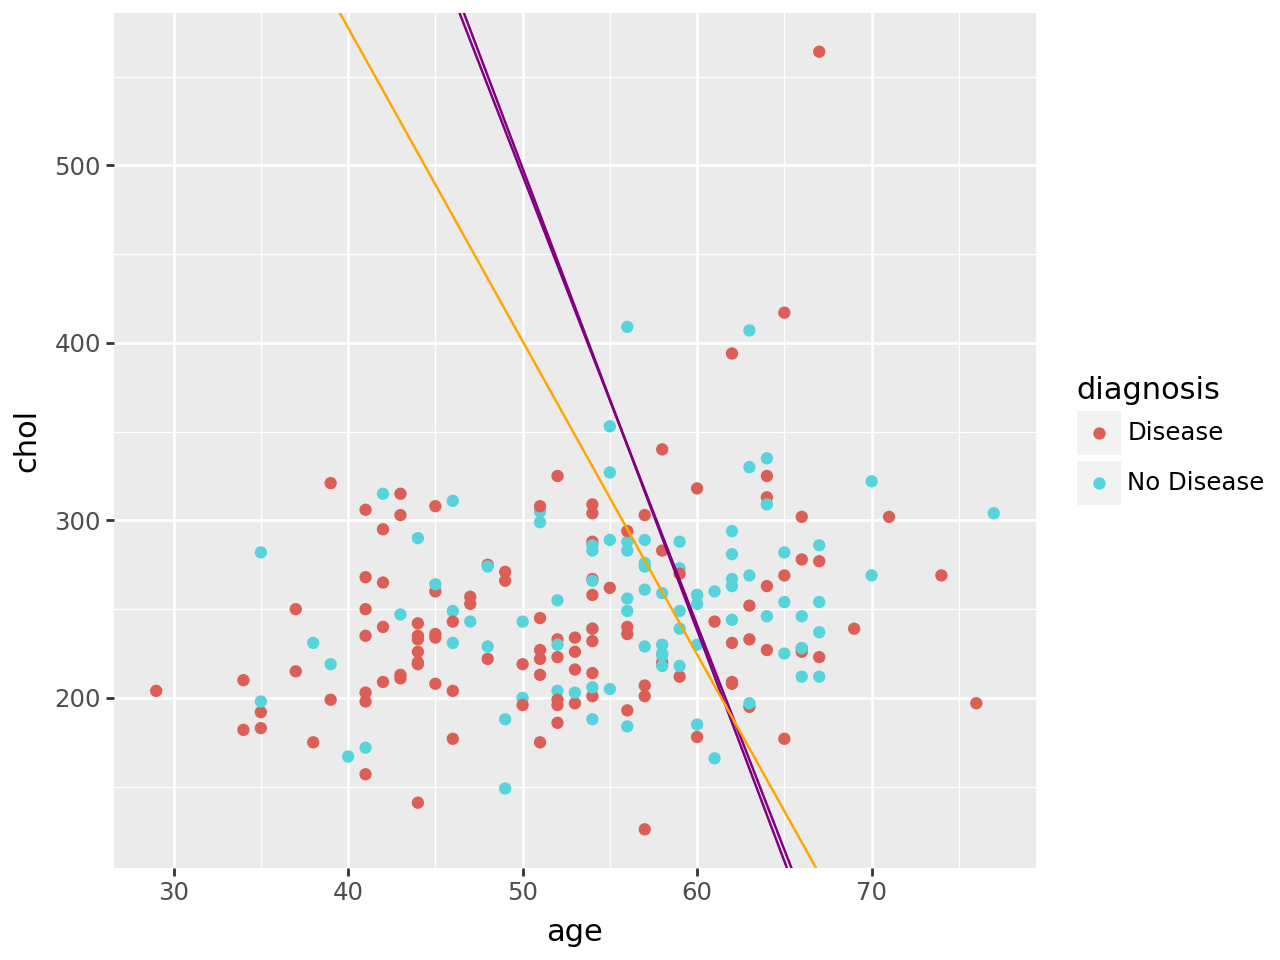

In [33]:
from plotnine import *

(ggplot(df, aes(x="age", y="chol", color="diagnosis"))
  + geom_point()
  + geom_abline(intercept = - intercept_log / coefs_log[1], slope = - coefs_log[0] / coefs_log[1], color = "purple")
  + geom_abline(intercept = - intercept_lda / coefs_lda[1], slope = - coefs_lda[0] / coefs_lda[1], color = "purple")
  + geom_abline(intercept = - intercept_svc / coefs_svc[1], slope = - coefs_svc[0] / coefs_svc[1], color = "orange"))